# Введение
В любом эксперименте важной частью, является представление данных в удобном виде. Для этого существует большое количество различных библиотек для визуализации. Ниже рассмотрим некоторые из них:

## 1. [Matplotlib](https://matplotlib.org)
Matplotlib - одна из первых библиотек созданная для визуализация. В следствии этого по ней много достаточно хороших статей и введений. Недостатками (на мой взгляд) является достаточно сложный синтаксис. Помочь с этим может высокоуровневая оболочка [Seaborn](https://seaborn.pydata.org).

## 2. [Plotly](https://plot.ly/python/) 
Plotly - библиотека с которой я работаю сейчас. С ней можно работать в двух видах: 
* Полный вид. Код начинается с команды `import plotly.graph_objects as go` 
* Компактный вид. Код начинается с команды `import plotly.express as px`
Нам будет достаточно компактного вида. Из плюсов библиотеки отмечу отличную [документацию](https://plot.ly/python/) с большим количеством примеров, также интерактивные графики. Из минусов: при большом количестве графиков могут начаться подтормаживания (решается включением неинтерактивный режима)

## 3. [Ggplot](http://ggplot.yhathq.com)
Ggplot - библиотека пришедшая из языка R. Основана на *grammar of graphic*. Имеет локанчиный синтаксис. Из минусов достаточно мало документации и примеров. Тут будет использваться реализция [plotline](https://plotnine.readthedocs.io/en/stable/).


# Установка библиотек
## Подготовка
0. (необязательно) Создадим новое окружение `conda create --name visual` 
1. Активируем его `conda activate visual`
2. Установим pandas и  numpy и Jupyter `conda install numpy pandas jupyter`
3. Создадим два массива (x и sin(x))

In [1]:
import numpy as np
import pandas as pd

x = np.linspace(0, 10, 100)
y = np.sin(x)


## Установка Matplotlib
`conda install matplotlib`

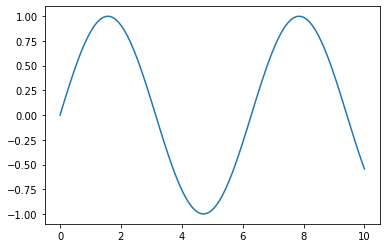

In [2]:
import matplotlib.pyplot as plt
plt.plot(x,y)

## Установка Plotly
Установка Plotly достаточно сложная (не в одну строчку)
Приведем тут, что говорит нам [документация](https://plot.ly/python/getting-started/)

1. `conda install plotly` (может возникать проблема No module named 'plotly', тогда пропишите pip install plotly)

2. Дальше если вы работаете
 через Jupter:

`conda install notebook ipywidgets`

через Jupterlab: 
```
conda install jupyterlab
conda install ipywidgets
```
(если как )



In [3]:
import plotly.express as px
fig = px.scatter(x=x, y=y)
fig.show()

Также для сохранения графиков (как картинки, либо вывода в неинтерактивный режиме) необходимо прописать: 
`conda install -c plotly plotly-orca psutil requests`

После этого график можно отобразить в неинтерактивном режиме либо сохранить:


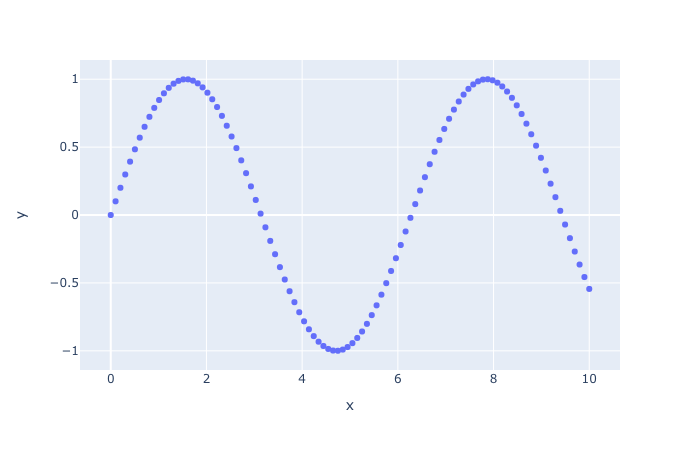

In [4]:
fig.show(renderer="png")

## Установка ggplot
`conda install -c conda-forge plotnine`

К сожалению работать в ggplot без DataFrame проблематично, поэтому сначало создадим его.


In [5]:
data = pd.DataFrame({'x': x,'y':y})

In [8]:
(
    ggplot(data,aes('x','y'))
    + geom_point()
)

NameError: name 'ggplot' is not defined

Мы убедились, что у нас все работает. Теперь перейдем к построению основных графиков.

# Scatter plot (Точечный график) 

Обычная задача возникающая на лабораторных работах:
Имеется две серии данных (c погрешностями). Необходимо нанести их на один график и построить аппроксимирующие функции. Отметим, что Seaborn, Plotly (краткая версия) и ggplot работают с DataFrame. 

Создадим DataFrame, с два сериями.
x1 = np.linespace(-2,2 ,50)

In [6]:
x1 = np.linspace(-2,2 ,25) + np.random.randn()
x2 = np.linspace(-3,3 ,25) + np.random.randn()

y1 = np.power(x1, 2) + 2
y2 = np.power(x2, 3) + 3
data1 = pd.DataFrame({'x':np.append(x1,x2),'y':np.append(y1,y2),'type':np.repeat([1,2], 25)})
data1

,x,y,type
0,-2.518171,8.341183,1
1,-2.351504,7.529571,1
2,-2.184837,6.773514,1
3,-2.018171,6.073012,1
4,-1.851504,5.428067,1
5,-1.684837,4.838677,1
6,-1.518171,4.304842,1
7,-1.351504,3.826563,1
8,-1.184837,3.403839,1
9,-1.018171,3.036671,1


## Scatter plot (Matplotlib) 

### Пример 1
Достаточно 

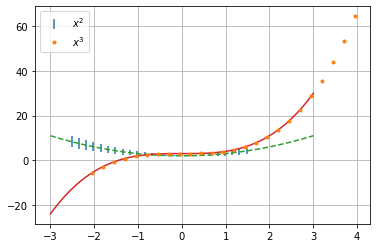

In [9]:
p2 = np.poly1d(np.polyfit(x1, y1, 2))
p3 = np.poly1d(np.polyfit(x2, y2, 3))
xp = np.linspace(-3, 3, 100)
plt.errorbar(x1, y1,yerr = [x*1 for x in x1],  ls='',  label='$x^2$')
plt.errorbar(x2, y2,  marker='.', ls='',label = '$x^3$')
plt.plot(xp,p2(xp),'--',xp,p3(xp))
plt.legend()
plt.grid()
plt.show()

**Пояснения** 

`np.poly1d(np.polyfit(x1, y1, 2))` - создание функции (см урок про numpy)

`plt.errorbar(x1, y1,yerr = [x*1 for x in x1],  ls='',  label='$x^2$')` - создает точки с погрешностями и по умолчанию соединяет их. `yerr (xerr)` может быть равен константе либо массиву значений. 

Для того, чтобы убрать соединения прописываем `ls=''`, что означает line style = None. `label = '$x^3$'` - значение, которое отобразится на легенде (для отображения легенды `plt.legend()`)

plt.grid() - создает сетку.
